In [1]:
from codes.utils import load_alpha_digits
import matplotlib.pyplot as plt
import numpy as np
from codes.DNN import DNN

# Alpha Digits Test DBN

(39, 320)


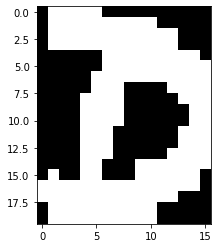

In [2]:
data = load_alpha_digits()
plt.imshow(data["dat"][13][0], cmap='gray')
d_letter = [data["dat"][13][i].flatten() for i in range(data["dat"][13].shape[0])]
d_letter = np.array(d_letter)   
print(d_letter.shape)

In [49]:
dnn = DNN(d_letter.shape[1], [30, 20])

dnn.pretrain(d_letter, 10, num_epochs=1000, lr=0.1)

Pretraining Complete: Reconstruction Error: 5.4197964


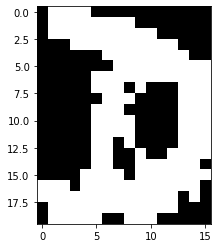

In [63]:
plt.imshow(dnn.generate_image_DBN(1,100, reshape=data["dat"][13][0].shape)[0], cmap='gray')
plt.show()

In [67]:
#first layer only

l = dnn.layers[0]
p_h = l.input_output(d_letter[0])
h = (np.random.random_sample(l.output_size) < p_h) * 1

p_v = l.output_input(h)
x_tild = (np.random.random_sample(l.input_size) < p_v) * 1

from codes.utils import reconstruction_error

reconstruction_error(d_letter[0], x_tild)

4.58257569495584

In [66]:
l.__dict__

{'input_size': 320,
 'output_size': 30,
 'W': array([[ 1.10037825, -1.7601185 ,  0.48174789, ...,  1.46289646,
          0.32897087, -1.80177225],
        [ 1.21569917,  0.37136987,  2.58877291, ...,  0.02832884,
         -2.28044103, -1.9294697 ],
        [ 2.07517995,  1.31992611, -0.78913048, ...,  1.40451893,
         -0.34158319, -2.6055969 ],
        ...,
        [-0.02692326,  0.19253472, -1.08205246, ..., -1.40334109,
         -0.70016183, -0.69647932],
        [ 0.39552884,  1.09130618,  0.11368031, ..., -1.24580146,
          0.9041928 ,  0.15552291],
        [-0.73914857,  1.19576626,  0.55437458, ..., -0.9273873 ,
          1.62605814, -2.33757692]]),
 'a': array([-9.78888889e-01, -2.79111111e+00, -2.27777778e-01, -2.07222222e+00,
        -2.36333333e+00,  3.60000000e-01,  7.15555556e-01, -8.85555556e-01,
         1.85555556e-01,  7.88888889e-02, -1.20000000e-01, -3.65555556e-01,
        -5.88888889e-01, -1.23888889e+00, -1.04222222e+00, -1.00222222e+00,
         2.77777778